In [1]:
import sys
import os
sys.path.append(os.getcwd()[:-8])

In [2]:
#! pip install xgboost

In [3]:
#!pip install shap
#!pip install time

In [55]:
import pandas as pd
import numpy as np
import time
import warnings
import shap
from ACME.ACME import ACME
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import xgboost as xgb

In [5]:
import warnings
warnings.filterwarnings("ignore")

## Full Boston dataset

In [6]:
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target
        
dataframe = pd.DataFrame(X, columns=boston.feature_names)
dataframe['target'] = y

In [7]:
features = dataframe.drop(columns={'target'}).columns

## Train different model

In [8]:
models = {}
#models['linear_regression'] = LinearRegression().fit(X,y)
#models['random_forest_regressor'] = RandomForestRegressor().fit(X,y)
#models['cat_boost_regressor'] = CatBoostRegressor().fit(X,y)
#models['svr'] = SVR().fit(X,y) 
models['xgboost'] = xgb.XGBRegressor().fit(X,y)

In [9]:
from sklearn.metrics import mean_squared_error
for model in models.keys():
    pred = models[model].predict(X)
    mse = mean_squared_error(y, pred)
    print(model +' '+ 'MSE: ' + str(mse))

xgboost MSE: 0.0014429986252473886


### Compare ASHAP and SHAP results

### BUILDING 

In [10]:
time_start = {}
time_elapsed = {}

XGBoost

In [11]:
time_start = time.time()
acme_xg = ACME(models['xgboost'],'target')
acme_xg = acme_xg.fit(dataframe, robust=True)
time_elapsed['ACME_XG'] = (time.time() - time_start)

In [21]:
time_start = time.time()
shap_xg = shap.KernelExplainer(models['xgboost'].predict,X)
shap_xg_values = shap_lr.shap_values(X)
time_elapsed['SHAP_XG'] = (time.time() - time_start)

Using 506 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/506 [00:00<?, ?it/s]

In [48]:
time_elapsed

{'ACME_XG': 0.24048805236816406, 'SHAP_XG': 1938.7088730335236}

#### Linear Regression

In [ ]:
time_start = time.time()
acme_lr = ACME(models['linear_regression'],'target')
acme_lr = acme_lr.fit(dataframe, robust=True)
time_elapsed['ACME_LR'] = (time.time() - time_start)

In [ ]:
time_start = time.time()
shap_lr = shap.KernelExplainer(models['linear_regression'].predict,X)
shap_lr_values = shap_lr.shap_values(X,nsamples=100)
time_elapsed['SHAP_LR'] = (time.time() - time_start)

#### Random Forest

In [ ]:
time_start = time.time()
acme_rf = ACME(models['random_forest_regressor'],'target')
acme_rf = acme_rf.fit(dataframe, robust=True)
time_elapsed['ACME_RF'] = (time.time() - time_start)

In [ ]:
time_start = time.time()
shap_rf = shap.KernelExplainer(models['random_forest_regressor'].predict, X)
shap_rf_values = shap_rf.shap_values(X,nsamples=100)
time_elapsed['SHAP_RF'] = (time.time() - time_start)

#### Cat_boost_regressor

In [ ]:
time_start = time.time()
acme_ct = ACME(models['cat_boost_regressor'],'target')
acme_ct = acme_ct.fit(dataframe,robust=True)
time_elapsed['ACME_CT'] = (time.time() - time_start)

In [ ]:
time_start = time.time()
shap_ct = shap.KernelExplainer(models['cat_boost_regressor'].predict, X)
shap_ct_values = shap_ct.shap_values(X, nsamples=100)
time_elapsed['SHAP_CT'] = (time.time() - time_start)

#### SVR

In [ ]:
time_start = time.time()
acme_svr = ACME(models['svr'],'target')
acme_svr = acme_svr.fit(dataframe, robust=True)
time_elapsed['ACME_SVR'] = (time.time() - time_start)

In [ ]:
time_start = time.time()
shap_svr = shap.KernelExplainer(models['svr'].predict,  X)
shap_svr_values = shap_svr.shap_values(X, nsamples=100)
time_elapsed['SHAP_SVR'] = (time.time() - time_start)

### VISUAL COMPARISON

In [ ]:
time_elapsed

## XGBOOST

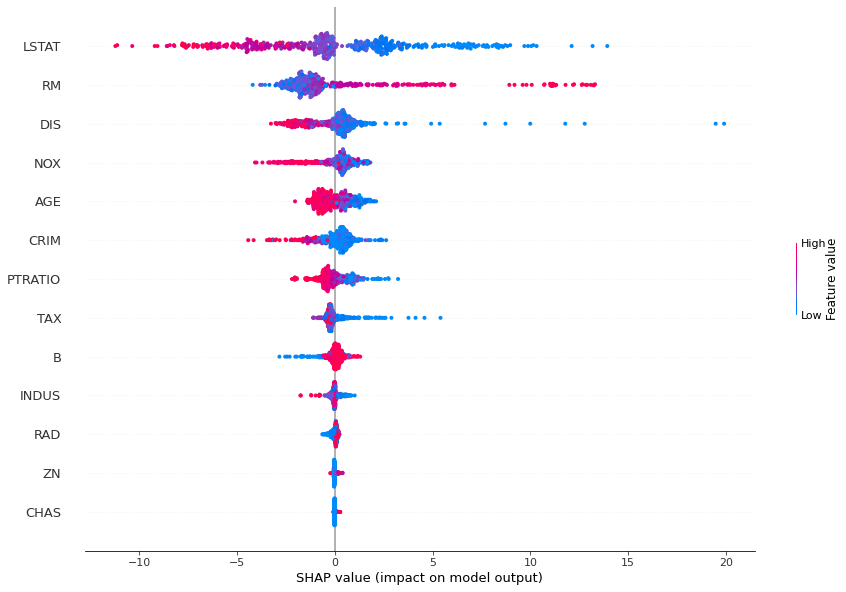

In [44]:
import matplotlib.pyplot as plt
shap.summary_plot(shap_xg_values, dataframe.drop(columns='target'), show=False, plot_size=(15,10))
plt.savefig('SHAP_xgb.pdf', format='pdf', dpi=600, bbox_inches='tight')

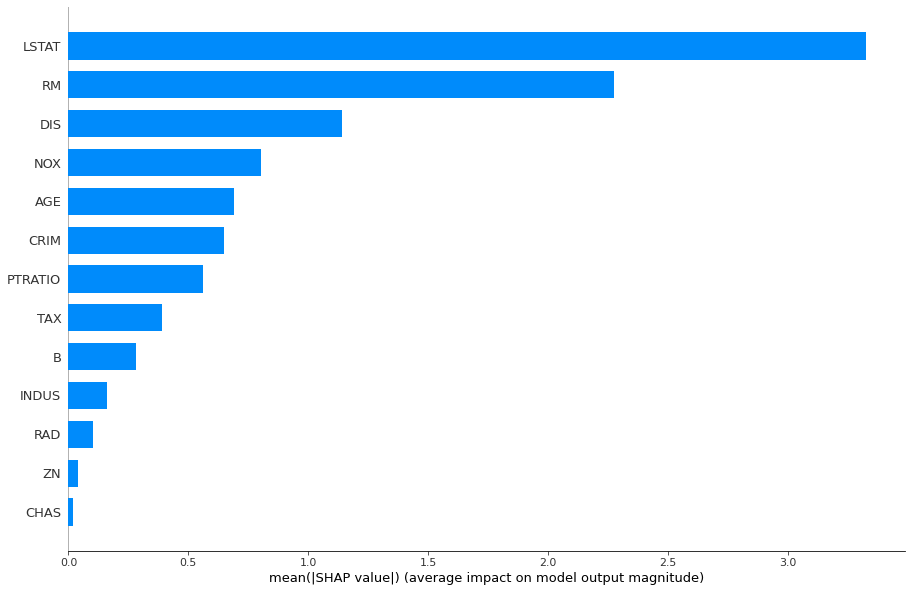

In [45]:
shap.summary_plot(shap_xg_values, dataframe.drop(columns='target'), show=False, plot_size=(15,10), plot_type='bar')
plt.savefig('SHAP_bar_xgb.pdf', format='pdf', dpi=600, bbox_inches='tight')

In [25]:
fig = acme_xg.summary_plot()

In [32]:
fig.update_layout(height=650).write_image('acme_xgb.pdf')

In [46]:
fig = acme_xg.bar_plot()

In [47]:
fig.update_layout(height=650).write_image('acme_bar_xgb.pdf')

### LinearModel


In [ ]:
shap.summary_plot(shap_lr_values, dataframe.drop(columns='target'),plot_type='bar',plot_size=(15,10), show=False)

In [ ]:
acme_lr.summary_plot()

### CatBoost

In [ ]:
shap.summary_plot(shap_ct_values, dataframe.drop(columns='target'),plot_type='bar',plot_size=(15,10), show=False)

In [ ]:
acme_ct.summary_plot()

### RandomForest 

In [ ]:
shap.summary_plot(shap_rf_values, dataframe.drop(columns='target'),plot_type='bar',plot_size=(15,10), show=False)

In [ ]:
acme_rf.summary_plot()

### SVR

In [ ]:
shap.summary_plot(shap_svr_values, dataframe.drop(columns='target'),plot_type='bar',plot_size=(15,10), show=False)